<a href="https://colab.research.google.com/github/PauloTchujo/PauloTchujo/blob/main/PythonparaInvestimentos_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON PARA INVESTIMENTOS #5
Aula: [Backtesting com Pyfolio | Sharpe, Beta, Volatilidade, CAGR, Drawdown](https://www.youtube.com/watch?v=d2qrsCfXung).

Nesta aula continuamos com os dados, carteira anterior e uma nova biblioteca. Uma biblioteca para a analise do portifólio.

# Introdução
Alguns dados da aula 4.

## Instalando as bibliotecas
* [Pyfolio](https://pyfolio.ml4trading.io/index.html);
* [Yfinance](https://pypi.org/project/yfinance/);

Utlizaremos a biblioteca "yfinance" para importar os dados, sem ter um motivo técnico.

_As bibliotecas de dados gratuitos podem conter erros, mas são úteis ao aprendizado._

In [1]:
!pip install pyfolio-reloaded
!pip install yfinance

     |████████████████████████████████| 76 kB 2.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 39.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Importando as bibliotecas
Algumas por serem nativas no colab não necessitam de instalação. Lembrando que no colab ao reinicializarmos o ambiente devemos instalar as bibliotecas necessárias.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf

## Definindo os ativos

In [3]:
tickers = ['OIBR3.SA', 'VIIA3.SA', 'CIEL3.SA', 'COGN3.SA',  'B3SA3.SA', '^BVSP']

## Definindo o periodo

In [4]:
inicio = '2017-01-01'
final = '2022-01-01'

## Importando os dados
Com já conhecemos basicamente a estrutura de retorno dos dados, vamos importar a coluna ***Adj Close*** (fechamento ajustado) para realizar as analises.

In [5]:
dados = yf.download(tickers=tickers, start=inicio, end=final, rounding=True)['Adj Close']

[*********************100%***********************]  6 of 6 completed


### Visualização
Com a função `head()` vamos visualizar as 5 primeiras linhas (defaut).

In [6]:
dados.head()

,B3SA3.SA,CIEL3.SA,COGN3.SA,OIBR3.SA,VIIA3.SA,^BVSP
Date,,,,,,
2017-01-02,4.57,16.9808,12.3614,1.9702,3.7813,59589.0
2017-01-03,4.76,17.4544,12.9748,1.9777,3.7017,61814.0
2017-01-04,4.85,17.2728,12.9005,1.9553,3.7713,61589.0
2017-01-05,4.79,17.0851,12.7332,1.9926,3.7813,62071.0
2017-01-06,4.79,17.1227,12.6402,2.0001,3.7415,61665.0


### Renomeando as colunas
Vamos renomear as colunas retirando o ".SA" dos ativos e também o indice ibovespa. Ficando, talvez mais agrádavel aos olhos.

In [7]:
dados.rename(columns={'B3SA3.SA': 'B3SA3', 'CIEL3.SA': 'CIEL3', 'COGN3.SA': 'COGN3', 
                      'OIBR3.SA': 'OIBR3', 'VIIA3.SA': 'VIIA3', '^BVSP': 'IBOV'}, inplace = True)

### Manipulando o indice das datas
Transformamos o indice das datas em uma série temporal de datas.

In [10]:
dados.index = dados.index.tz_localize('utc')

### Analise estatistica básica
A função `describe()` fornece uma primeira analise dos dados.

Podemos ver que o IBOV contém menos dados.

In [11]:
dados.describe()

,B3SA3,CIEL3,COGN3,OIBR3,VIIA3,IBOV
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1235.000000
mean,11.116589,9.258519,9.628252,1.924019,8.831255,93214.344130
std,4.537812,5.849727,4.397700,0.878152,4.575497,18639.821202
min,4.570000,1.931400,2.350000,0.440000,3.124500,59589.000000
25%,6.760000,3.756700,4.930000,1.175000,5.145000,76716.000000
50%,11.020000,7.164500,10.375200,1.710000,7.500000,95369.000000
75%,14.930000,16.123050,12.636000,2.709000,12.075000,107343.000000
max,20.730000,21.221600,20.149900,4.522500,21.290000,130776.000000


## Construindo a carteira
Ao analisarmos os preços absolutos pode ficar dificil comparar os dados.

### Calculando os retornos
Pratica dos retornos facilita a comparação dos ativos.

In [12]:
retornos = dados.pct_change()

retornos.head()

,B3SA3,CIEL3,COGN3,OIBR3,VIIA3,IBOV
Date,,,,,,
2017-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00+00:00,0.041575,0.027890,0.049622,0.003807,-0.021051,0.037339
2017-01-04 00:00:00+00:00,0.018908,-0.010404,-0.005726,-0.011326,0.018802,-0.003640
2017-01-05 00:00:00+00:00,-0.012371,-0.010867,-0.012968,0.019076,0.002652,0.007826
2017-01-06 00:00:00+00:00,0.000000,0.002201,-0.007304,0.003764,-0.010525,-0.006541


### Informações dos retornos

In [13]:
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1243 entries, 2017-01-02 00:00:00+00:00 to 2021-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B3SA3   1242 non-null   float64
 1   CIEL3   1242 non-null   float64
 2   COGN3   1242 non-null   float64
 3   OIBR3   1242 non-null   float64
 4   VIIA3   1242 non-null   float64
 5   IBOV    1242 non-null   float64
dtypes: float64(6)
memory usage: 68.0 KB


### Normalizando os preços
Utlizando uma outra maneira de normalizar os preços e trazendo-os para a mesma base de saída.

Quando calculamos os retornos a primeira linha necesita os dados anteriores retornando "NaN". E assim vamos colocar valor 1 no primeiro dia.

Analisando as ultimas linhas com a função `tail()` podemos ver a valorização ou desvalorização dos ativos individuais.

In [14]:
retornos_acumulados = (1 + retornos).cumprod()
retornos_acumulados.iloc[0] = 1

retornos_acumulados.tail()

,B3SA3,CIEL3,COGN3,OIBR3,VIIA3,IBOV
Date,,,,,,
2021-12-23 00:00:00+00:00,2.479212,0.119959,0.194962,0.375596,1.190067,1.760241
2021-12-27 00:00:00+00:00,2.463895,0.123357,0.194153,0.365445,1.285272,1.770981
2021-12-28 00:00:00+00:00,2.431072,0.128451,0.194962,0.406050,1.309074,1.759788
2021-12-29 00:00:00+00:00,2.413567,0.126184,0.193344,0.385748,1.327586,1.747084
2021-12-30 00:00:00+00:00,2.426696,0.134269,0.199007,0.385748,1.388411,1.759083


### Analisando a carteira
A nossa carteira seria com os ativos, e o IBOV é o nosso _Benchmark_. Então vamos construir um novo _dataframe_ sem o IBOV.

Também vamos:
* Realizar o investimento inicial de $ 10.000 em cada ativo, hipoteticamente.
* Calcular duas novas colunas:
1. Com o saldo em valor;
2. Com o retorno diário;

In [15]:
carteira = retornos_acumulados.iloc[: , :-1]*10000
carteira['Saldo'] = carteira.sum(axis=1)
carteira['Retorno'] = carteira['Saldo'].pct_change()

### Visualizando a carteira
Observe que iniciamos a carteira com um saldo de $ 50.000 e no ultimo dia da analise temos um saldo menor.

In [16]:
carteira

,B3SA3,CIEL3,COGN3,OIBR3,VIIA3,Saldo,Retorno
Date,,,,,,,
2017-01-02 00:00:00+00:00,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2017-01-03 00:00:00+00:00,10415.754923,10278.903232,10496.222111,10038.067201,9789.490387,51018.437854,0.020369
2017-01-04 00:00:00+00:00,10612.691466,10171.958918,10436.115650,9924.373160,9973.554069,51118.693264,0.001965
2017-01-05 00:00:00+00:00,10481.400438,10061.422312,10300.774993,10113.694041,10000.000000,50957.291784,-0.003157
2017-01-06 00:00:00+00:00,10481.400438,10083.564967,10225.540796,10151.761243,9894.745193,50837.012637,-0.002360
...,...,...,...,...,...,...,...
2021-12-23 00:00:00+00:00,24792.122538,1199.590125,1949.617357,3755.963862,11900.669082,43597.962964,-0.007922
2021-12-27 00:00:00+00:00,24638.949672,1233.569679,1941.527659,3654.451325,12852.722609,44321.220943,0.016589
2021-12-28 00:00:00+00:00,24310.722101,1284.509564,1949.617357,4060.501472,13090.735990,44696.086484,0.008458


## Utilizando o exemplo da documentação do Pyfolio
Muitas das analises temos que estudar para entender, fazendo parte da técnica.

### Analisando a carteira

Start date,2017-01-02
End date,2021-12-30
Total months,59
,Backtest
Annual return,-1.963%
Cumulative returns,-9.317%
Annual volatility,39.098%
Sharpe ratio,0.15
Calmar ratio,-0.03
Stability,0.12
Max drawdown,-63.255%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.26,2020-07-20,2021-12-23,NaT,NaN
1,58.73,2020-02-21,2020-03-23,2020-07-08,99
2,44.68,2017-10-18,2018-12-26,2020-01-14,585
3,10.66,2017-05-10,2017-05-18,2017-07-12,46
4,9.61,2017-03-15,2017-04-05,2017-05-02,35


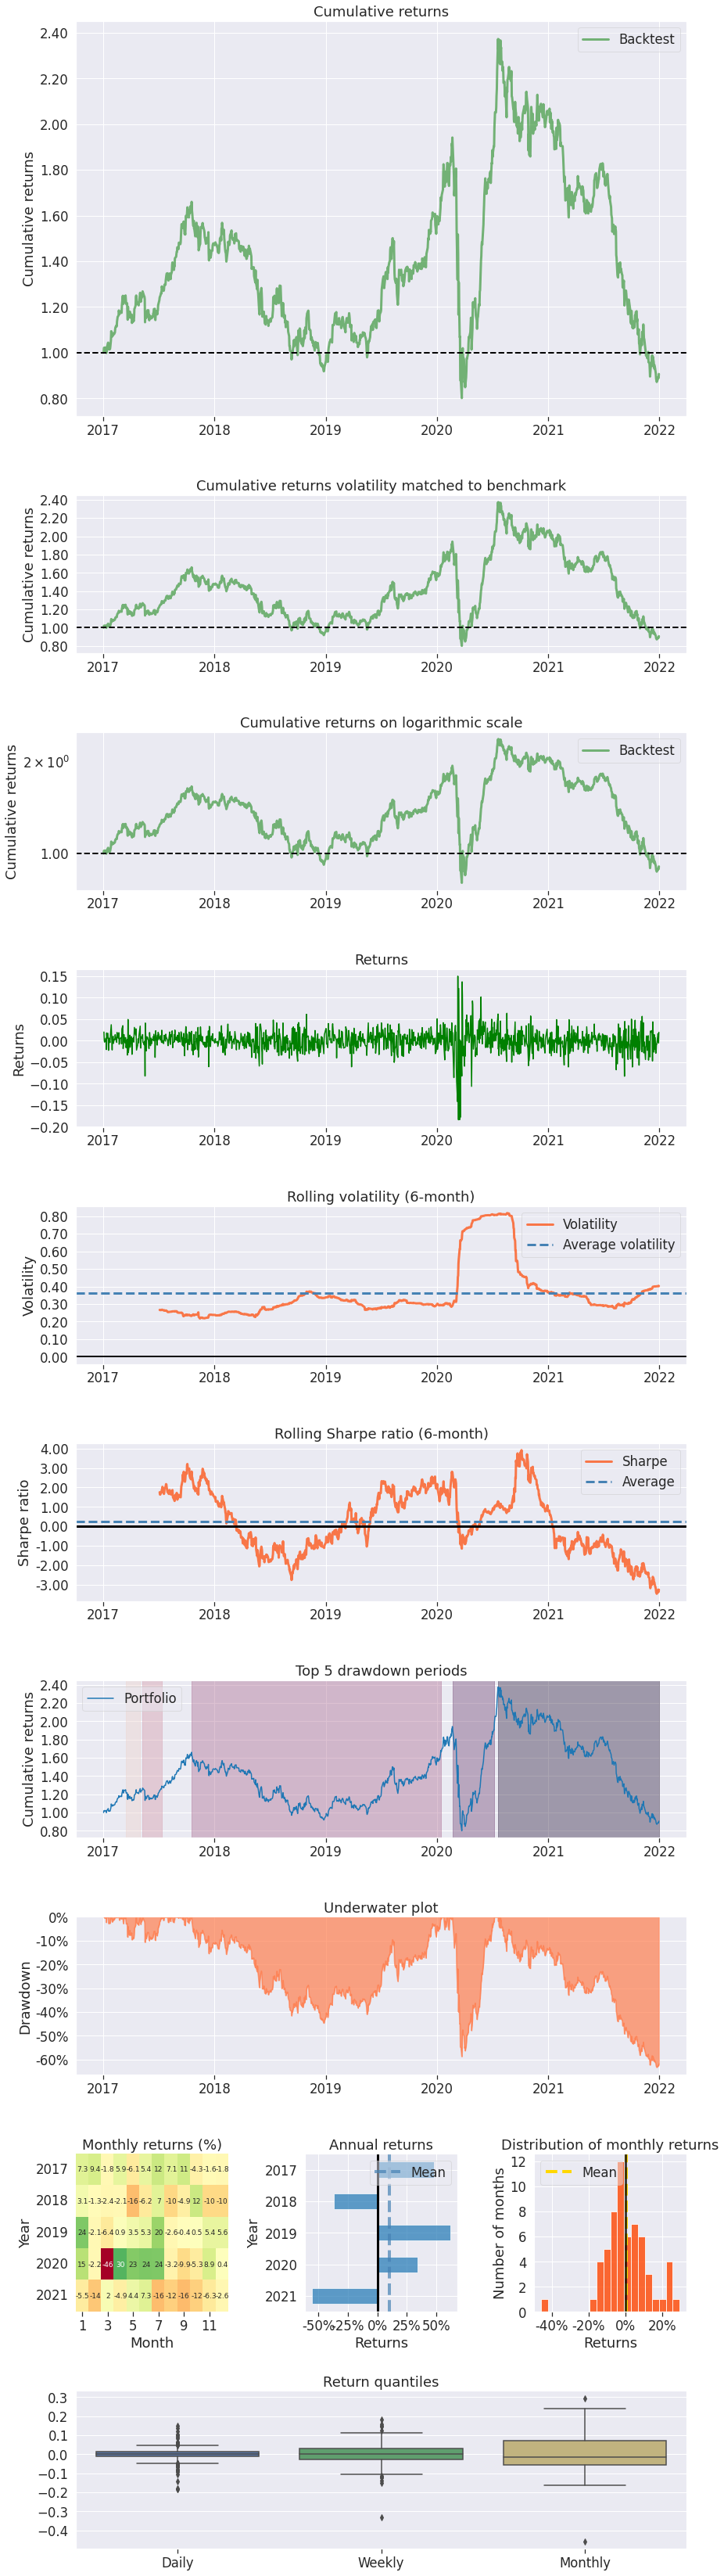

In [ ]:
pf.create_returns_tear_sheet(carteira['Retorno'])

### Analisando a carteira em janelas temporais

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.26,2020-07-20,2021-12-23,NaT,NaN
1,58.73,2020-02-21,2020-03-23,2020-07-08,99
2,44.68,2017-10-18,2018-12-26,2020-01-14,585
3,10.66,2017-05-10,2017-05-18,2017-07-12,46
4,9.61,2017-03-15,2017-04-05,2017-05-02,35


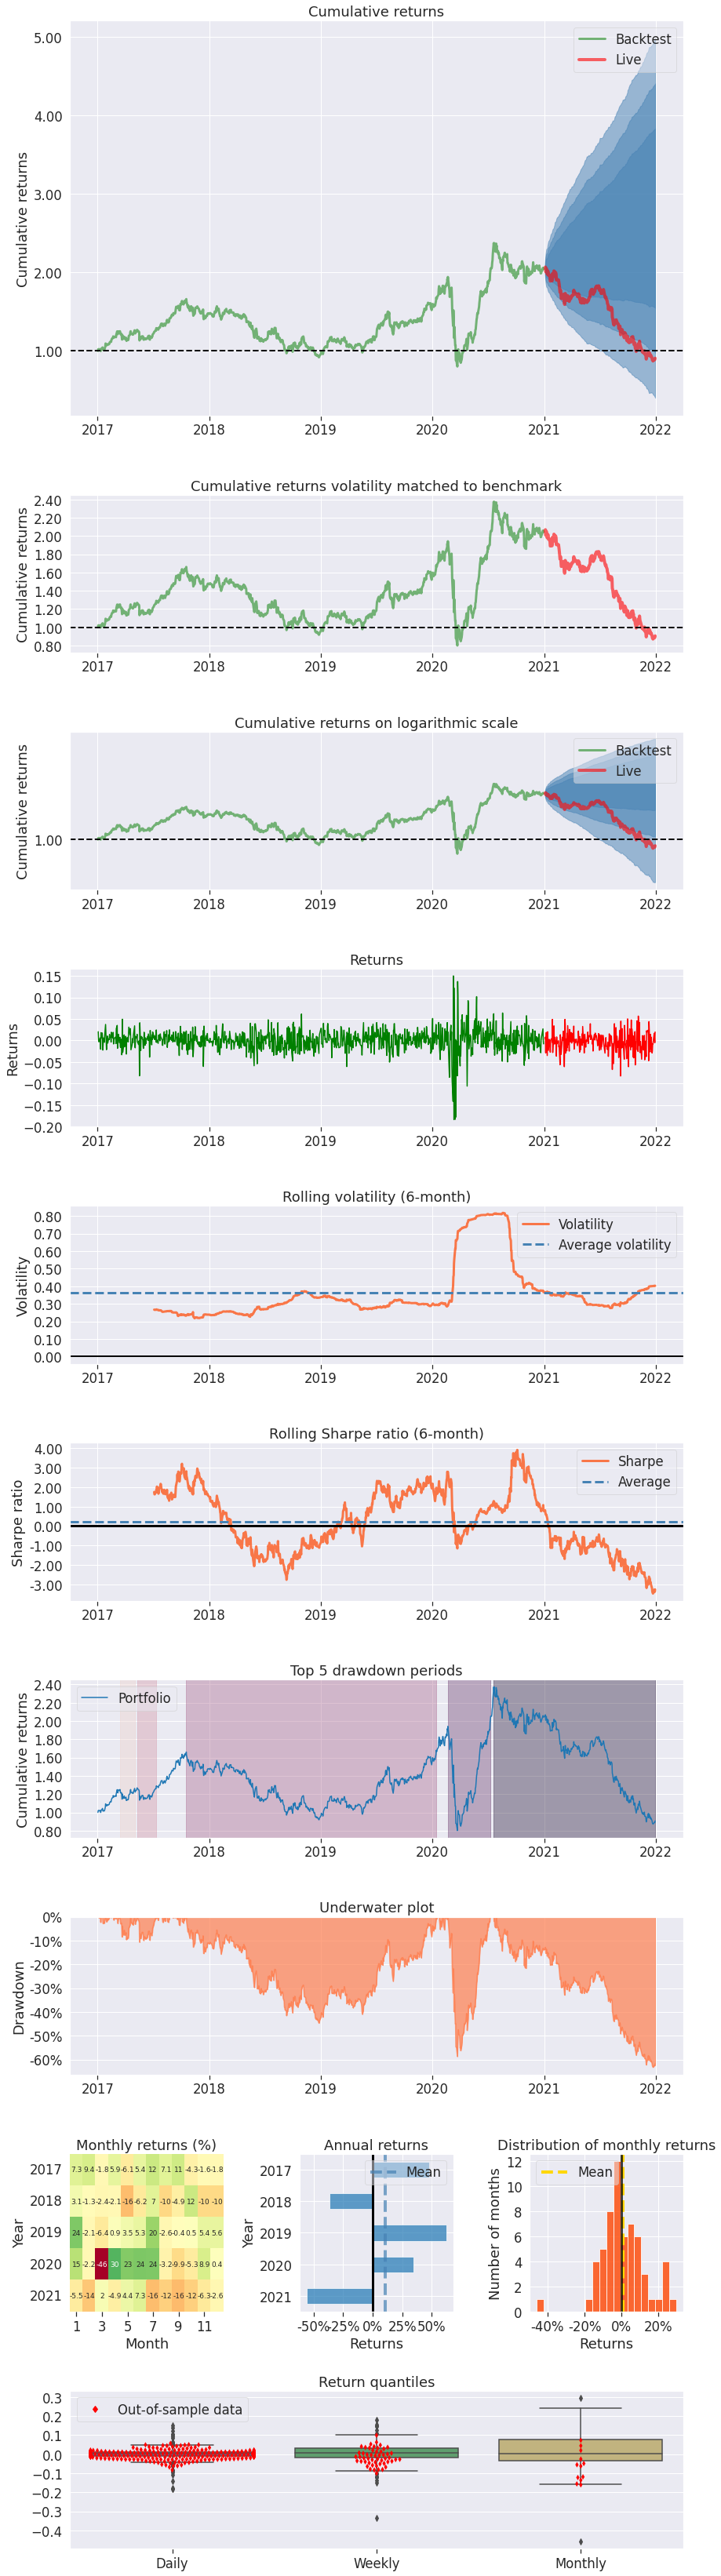

In [ ]:
pf.create_returns_tear_sheet(carteira['Retorno'], live_start_date='2021-01-01')

### Analisando um ativo individual em janelas temporais

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.81,2020-07-20,2021-12-01,NaT,NaN
1,42.70,2020-02-19,2020-03-23,2020-06-25,92
2,29.10,2018-02-26,2018-06-18,2018-11-01,179
3,14.23,2019-11-11,2019-12-30,2020-02-03,61
4,13.60,2017-10-25,2017-12-08,2018-01-19,63


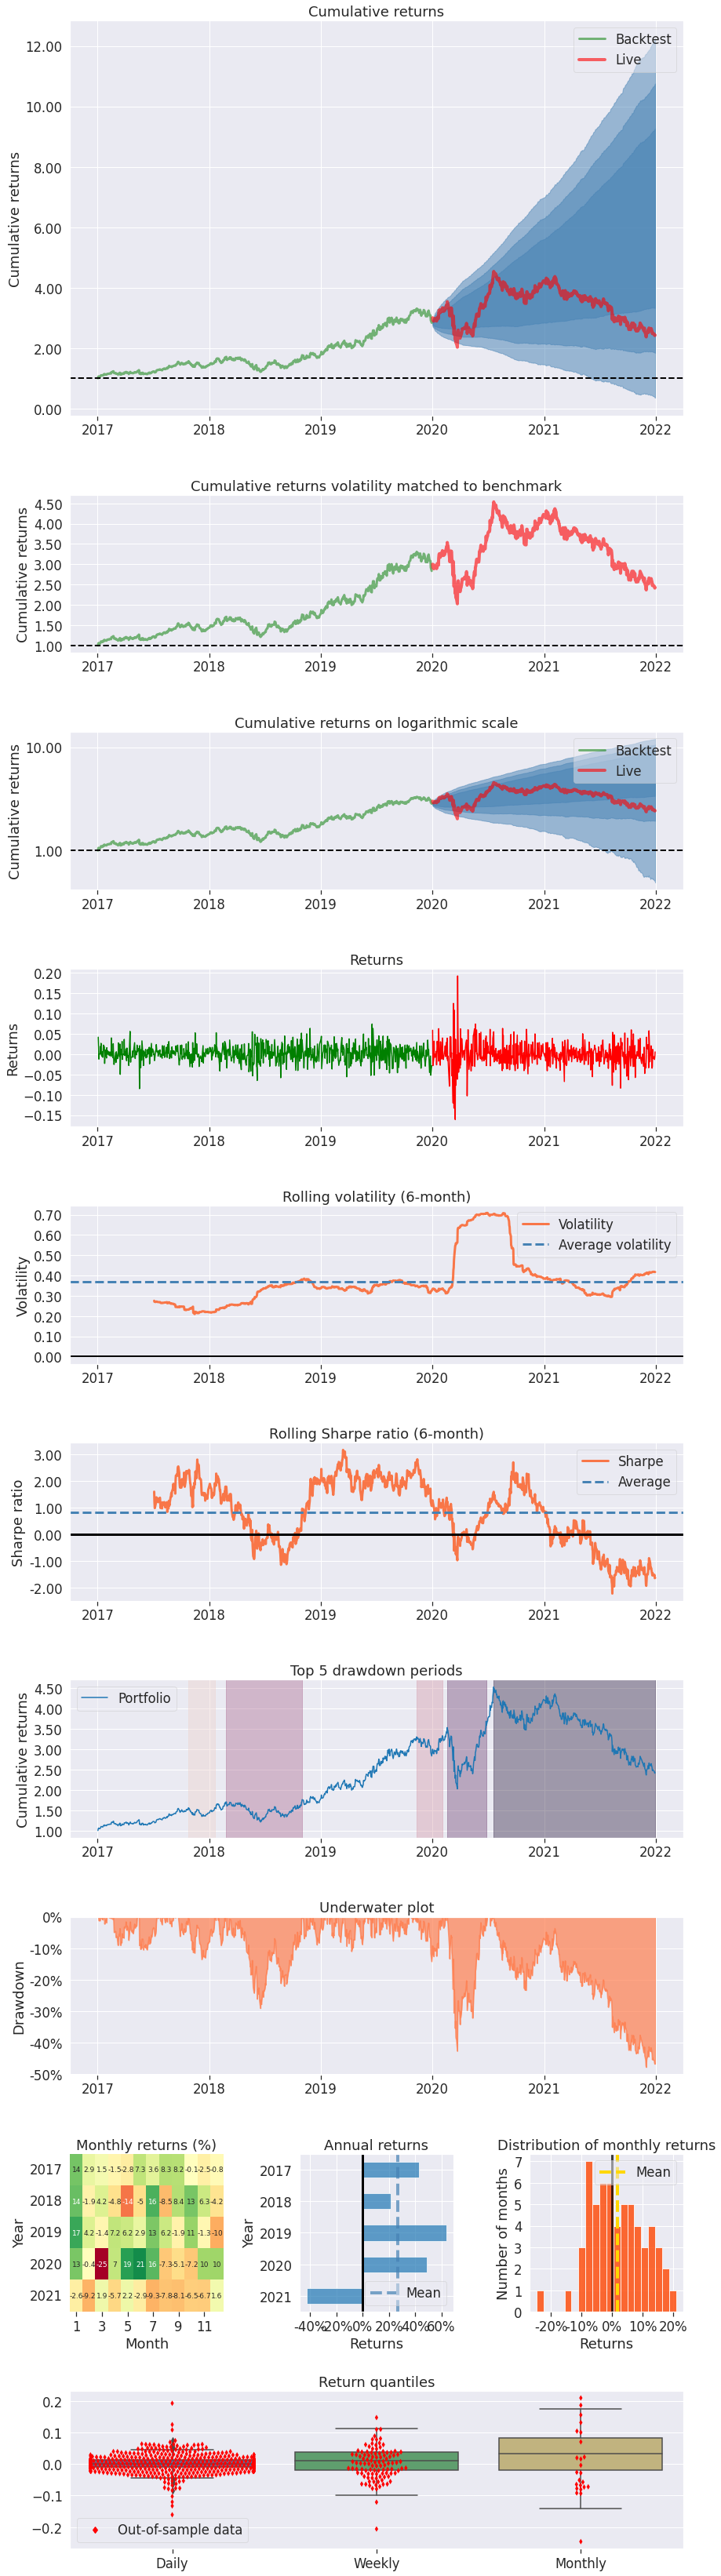

In [ ]:
pf.create_returns_tear_sheet(retornos['B3SA3'], live_start_date='2020-01-01')

### Analisando Metrica especifica
Vamos plotar o grafico dos retornos anuais.

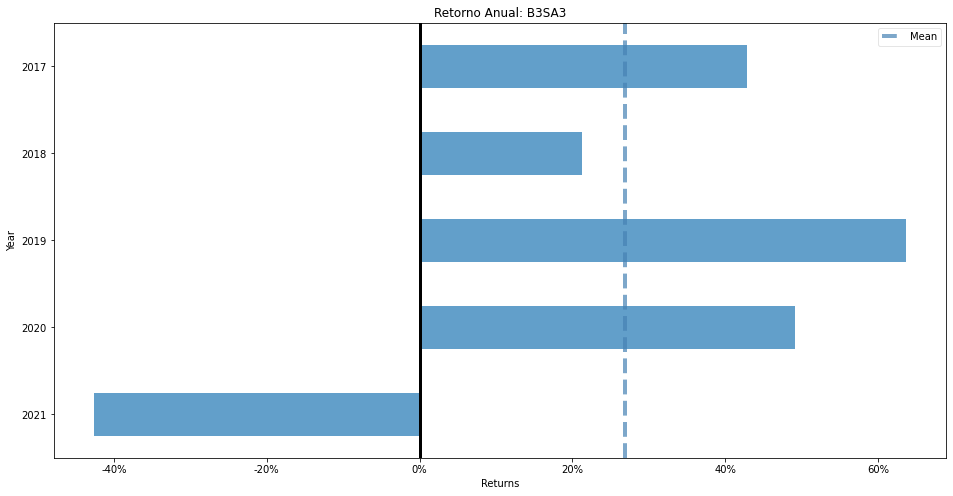

In [ ]:
plt.figure(figsize=(16,8))
pf.plot_annual_returns(returns=carteira['B3SA3'])
plt.title('Retorno Anual: B3SA3')
plt.show()

## Utilizando o exemplo da aulo no You tube
O grafico compartivo do Beta apresentou problemas durante a aula, plotamos então ele separadamete para uma melhor visualização.

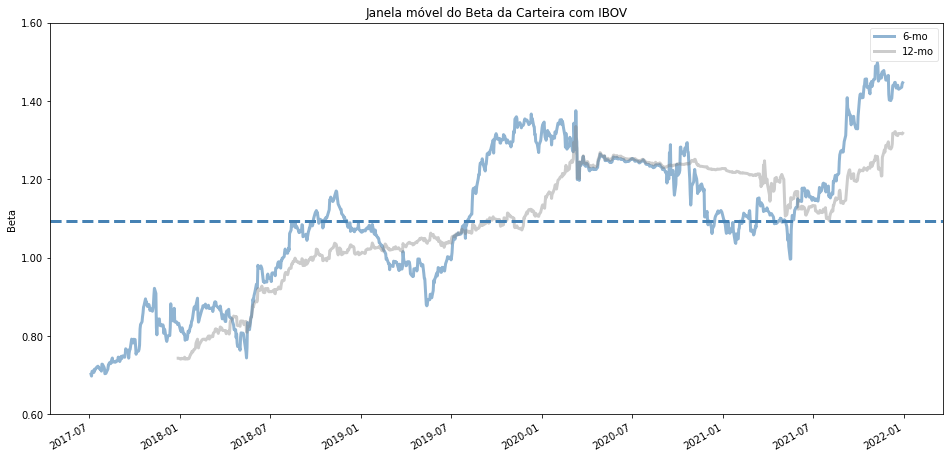

In [ ]:
fig, ax1 = plt.subplots(figsize = (16,8))
pf.plot_rolling_beta(carteira['Retorno'], factor_returns=retornos['IBOV'], ax=ax1)
plt.title('Janela móvel do Beta da Carteira com IBOV')
plt.ylim(0.6, 1.6);

## Conclusão
1. Tranformar o indice em serie temporal auxilia a utilização da biblioteca, principalmente quando escolhemos os ativos pelo passado e testamos em uma outra janela temporal também no passado. Vemo que o passado não se repete e pode trazer resultados pouco desejaveis a carteira do investidor.
2. Para melhorar o entendimento da biblioteca devemos realizar pesquisas e estudos complementares, assim podemos aproveita-la melhor.
3. O código apresentado pelo professor na aula do you tube está diferente deste notebook. Minha idéia, ir melhorando e acrescentando comentários e funções que acredite ser úteis.